# Übung 2 - Bildverarbeitungsoperatoren 

**Name:** Faiz Akbar Daud, **Matr.-Nr.:** 552351
<br>
**Name:** Hatem Al-tayi, **Matr.-Nr.:** 557187

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Do, 21.11.2019
<br>
**Abgabe:** Do, 19.12.2019, 23:55 Uhr

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die praktische Anwendung, der in der Vorlesung eingeführten Bildverarbeitungsoperatoren, wie z.B. Filterung im Ortsraum zur globalen Rauschunterdrückung, morphologische Operatoren usw.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000_s0500001.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 35% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

### Aufgabenbeschreibung
Der Begriff **Leukämie**, auch Blutkrebs genannt, steht für eine Gruppe von Krebserkrankungen des blutbildenden Systems. Die einzelnen Formen unterscheiden sich bezüglich Häufigkeit, Ursachen, Behandlungsmöglichkeiten und Heilungsaussichten zum Teil stark voneinander. Leukämie geht von den Knochenmarkszellen aus und ist in der Regel durch eine stark erhöhte Zahl weißer Blutkörperchen im Blut gekennzeichnet. 

![BlutBild](Blutbild_LeukaemieVsGesund.jpg)


***Eine Leukämie geht mit Veränderungen im Blutbild einher*** (Bildquelle: Apotheken-umschau)




             

### 1. Aufgabe - Einlesen und Visualisieren eines Leukämie(CLL)-Zellenbildes

Die chronische lymphatische Leukämie (CLL) ist ein niedrigmaligne, in der westlichen Welt die am häufigsten vorkommende Leukämieform. Die Diagnose dieser Erkrankung erfolgt zunächst im Blutbild. Lesen sie die Datei "leukaemie.jpg" ein, um ein solches Blutbild darzustellen. Visualisieren Sie das eingelesene Bild (verwenden Sie die Funktionen `imshow` und `show`). Konvertieren Sie die .jpg-Datei in ein numpy-array.



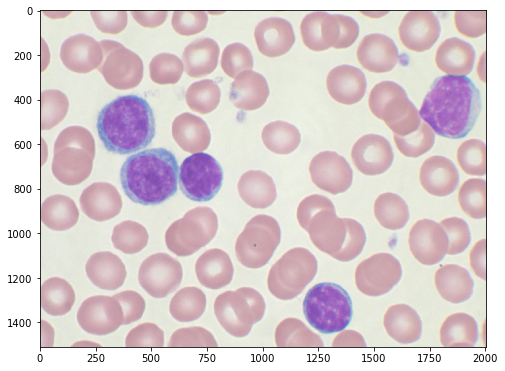

[[[230 229 225]
  [228 227 223]
  [226 223 218]
  ...
  [205 169 169]
  [205 169 169]
  [204 168 168]]

 [[232 231 227]
  [229 228 224]
  [228 225 220]
  ...
  [205 169 169]
  [205 169 169]
  [204 168 168]]

 [[234 233 229]
  [231 230 226]
  [230 227 222]
  ...
  [205 169 169]
  [205 169 169]
  [204 168 168]]

 ...

 [[222 193 197]
  [221 192 196]
  [221 192 196]
  ...
  [210 174 178]
  [209 173 177]
  [208 171 178]]

 [[220 191 195]
  [220 191 195]
  [220 191 195]
  ...
  [211 175 179]
  [210 174 178]
  [208 172 176]]

 [[219 190 194]
  [219 190 194]
  [218 189 193]
  ...
  [212 176 180]
  [210 174 178]
  [208 172 176]]]


In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

#Das Bild wird eingelesen und ausgegeben
img = imread('leukaemie.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()
print (img)


### 2. Aufgabe - Orts- und Frequenzraumanalyse sowie Filterung des Zellbildes

Im Rahmen dieser Aufgabe sollen Sie Ihre Kenntnisse mit globalen Bildstörungen einsetzen, indem Sie auf diese Störungen zurückzuführende Veränderungen im Frequenzraum erkennen und eliminieren. Um solch eine spektrale Bildanalyse durchführen zu können, müssen Sie mittels Fourierttrasformation vom Ortsraum in den Frequenzraum wechseln. Dazu können Sie aus `numpy` die ensprechende mathematische Funktion namens `fft` benutzen. Ebenfalls lässt sich die `fft` Funktion der `cv2` library einsetzen und ist ggf. bis zu 3x performanter. 

**2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen**
- Erzeugen Sie im ersten Schritt globale Bildstörungen (Rauschen). Globale Bildstörung kann z.B. Gauss-Rauschen, Salz-Pfeffer-Rauschen o.ä. periodische Bildartefakte sein (vgl. VL-Folien).
- Wenden Sie das erzeugte Rauschen auf das Bild `leukaemie.jpg` an. 
- Wenden Sie die Fouriertransformation sowohl auf das Grauwertbild als auch auf die verrauschte Kopie des Grauwertbildes an.
- Visualisieren Sie beide Bilder mit ihren jeweiligen Frequenzspektren (`subplot` mit 2x2-Raster)


**2.2: Histogramme erzeugen**
- Visualisieren Sie die Histogramme des verrauschten sowie des unverarbeiteten Originalbildes, um die Grauwertverteilungen darzustellen.


**2.3: Filterung im Frequenzraum**
- Führen Sie eine Filterung des verrauschten Bildes (im Frequenzraum!) durch, um die zuvor (in der Teilaufgabe 2.1) erzeugten Störungen wieder weitesgehend zu eliminieren
- Visualisieren Sie das gefilterte Bild sowie das dazugehörige Frequenzspektrum nebeneinander.

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 


**Hinweise:**
- Beim Einlesen des Bildes (z.B. mit `imread` aus der Bibliothek `skimage`) den Parameter `as_gray` gleich 'True' setzen und mit diesem Graubild weiterarbeiten. Beim plotten müssen Sie ggf. dennoch `cmap='gray'` setzen.
- Falls Sie Gauss-Rauschen erzeugen, dann sollte der Sigma-Wert nicht das Maximum von 1.0 überschreiten - denn es reicht ein leichtes Rauschen, das zusätzlich zum Ortsraum auch im Frequenzraum erkennbar ist.
- Vor der Anwendung der Fouriertransformation müssen Sie die Bildgröße anpassen, da das Originalbild nicht quadratisch ist (vgl. VL-Folien zur FFT: Anzahl Zeilen/Spalten muss identisch sein!)
- Führen Sie die Filterung im Frequenzraum durch, weil es sich um eine globale Bildstörung handelt! Überlegen Sie vorher, was der Filter bewirken soll (glätten? Kanten hervorheben?, ..) und probieren Sie unterschiedliche Filterkerngrößen (3x3, 5x5,7x7) aus! Und denken Sie an die anschließende Rücktransformation!



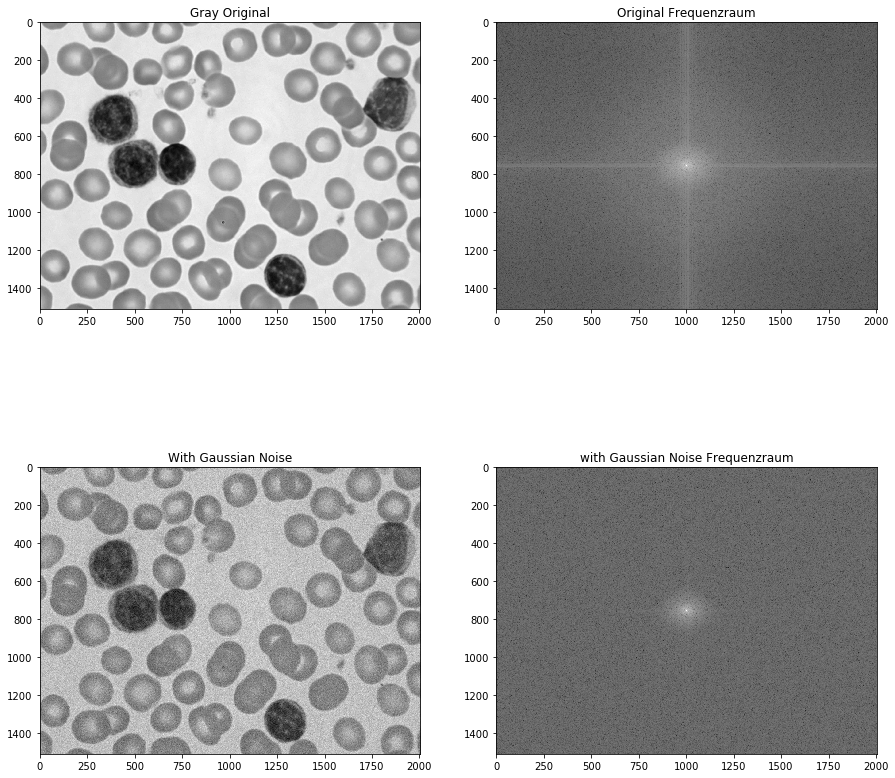

In [11]:
#Aufgabe 2.1
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

from PIL import Image  
import PIL  
from PIL import ImageOps

#image =cv2.imread('leukaemie.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('leukaemie.jpg',0)
plt.figure(figsize=(15,15))

# Hier wird das Rauschen mithilfe von Gauss erzeugt
mean = 0
sigma = 10
gauss = np.random.normal(mean, sigma,(image.shape[0],image.shape[1]) ) 

# Hier wird das Originale Bild (Grau Bild) mit dem Gauss übereinandergelappt
noise = np.zeros(image.shape, np.float32)
noise = image + gauss
cv2.normalize(noise, noise, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noise = noise.astype(np.uint8)

# Hier wird der Frequenzraum vom Original Bild (Graubild) erzeugt
fourierog = np.fft.fft2(image)
fshiftog = np.fft.fftshift(fourierog)
magnitude_spectrumog = 20*np.log(np.abs(fshiftog))

# Hier wird der Frequenzraum vom verrauschten Bild erzeugt
fouriernoise = np.fft.fft2(noise)
fshiftnoise = np.fft.fftshift(fouriernoise)
magnitude_spectrumnoise = 20*np.log(np.abs(fshiftnoise))

# Hier werden alle Bilder Sortiert und ausgegeben
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title("Gray Original")
plt.subplot(2, 2, 2),plt.imshow(magnitude_spectrumog, cmap='gray')
plt.title("Original Frequenzraum")
plt.subplot(2, 2,3), plt.imshow(noise, cmap='gray')
plt.title("With Gaussian Noise")
plt.subplot(2, 2,4),plt.imshow(magnitude_spectrumnoise,cmap='gray')
plt.title("with Gaussian Noise Frequenzraum")

plt.show()

#Fragen:
# Warum Sigma auf 1,0 ?
# Fouriertransformation auch ohne Quadratische Bild Größe mgl
# Können wir 2.4 als kommentare schreiben oder müssen wir das als seperate aufgabe angeben?
# Gewichtung der Übungen für Gesamtnote

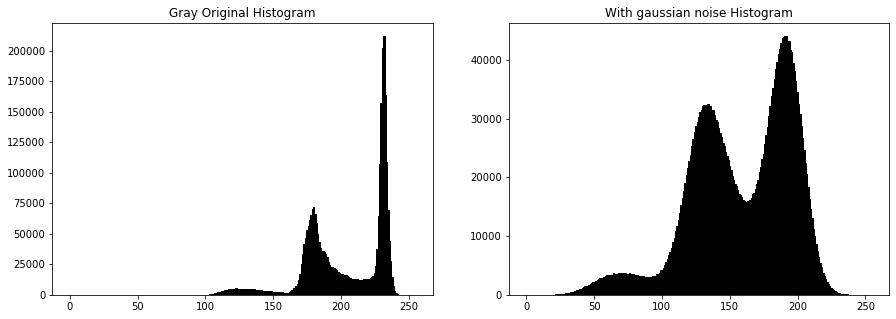

In [12]:
#Aufgabe 2.2

# Hier werden die Histogramme (Vom Original Grau Bild & dem verrauschten Graubild) erzeugt , sortiert und ausgegeben
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1), plt.hist(image.ravel(), bins=256, range=(0,255), fc='k', ec='k')
plt.title("Gray Original Histogram")
plt.subplot(1, 2, 2), plt.hist(noise.ravel(), bins=256, range=(0,255), fc='k', ec='k')
plt.title("With gaussian noise Histogram")
plt.show()


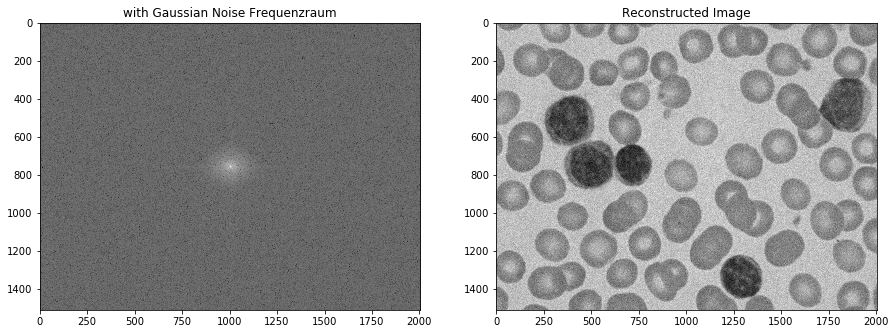

In [13]:
#Aufgabe 2.3

#dst
#dst = cv2.fastNlMeansDenoising(noise, dst, 2)

f_ishift = np.fft.ifftshift(fshiftnoise)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

#im_new = fftpack.ifft2(im_fft2).real
#plt.figure()
#plt.imshow(im_new, plt.cm.gray)

plt.figure(figsize=(15,15))
plt.subplot(1, 2,1),plt.imshow(magnitude_spectrumnoise,cmap='gray')
plt.title("with Gaussian Noise Frequenzraum")
plt.subplot(1, 2,2),plt.imshow(img_back,cmap='gray')
plt.title("Reconstructed Image")

plt.show()

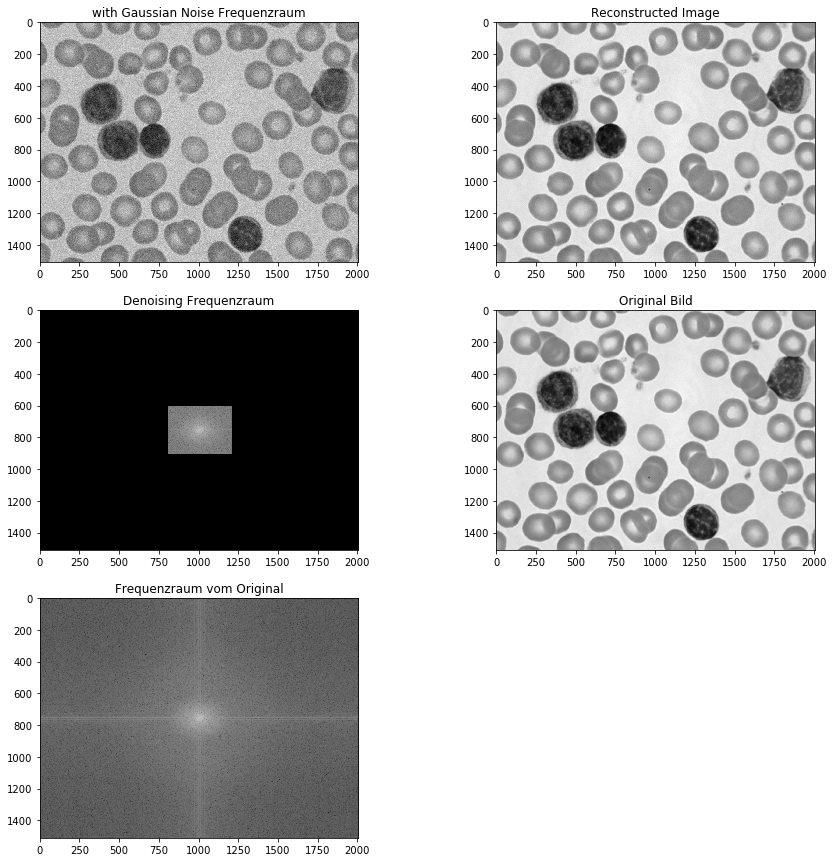

In [14]:
#Aufgabe 2.3

from scipy import fftpack
im_fft = fftpack.fft2(noise)

# Hier definieren wir die koeffizienten in jede Richtung
keep_fraction = 0.1

# Erzeugt eine Kopie vom verrauscheten Graubild (im_fft) 
im_fft2 = im_fft.copy()

# r und c als Variablen für die Anzahl der Zeilen und Spalten
r, c = im_fft2.shape

# Die größe der "Maske" in Zeilen-Richtung wird berechnet
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 1

# Das selbe nur mit den Spalten
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 1

# Hier wird nur der wirklich vorhandene Teil angezeigt
# FFT = fast Fourier transform
# iFFT = Inverse Fast Fourier Transformation
im_new = fftpack.ifft2(im_fft2).real

# Das rekonstruierte Bild wird als Freuquenraum dargestellt
fourierdenoise = np.fft.fft2(im_new)
fshiftdenoise = np.fft.fftshift(fourierdenoise)
magnitude_spectrumdenoise = 20*np.log(np.abs(fshiftdenoise))

# Das Original Bild wird als Freuquenraum dargestellt
fourierdenoisex = np.fft.fft2(image)
fshiftdenoisex = np.fft.fftshift(fourierdenoisex)
magnitude_spectrumdenoisex = 20*np.log(np.abs(fshiftdenoisex))


plt.figure(figsize=(15,15))
plt.subplot(3, 2,1),plt.imshow(noise,cmap='gray')
plt.title("with Gaussian Noise Frequenzraum")
plt.subplot(3, 2,2),plt.imshow(im_new,cmap='gray')
plt.title("Reconstructed Image")
plt.subplot(3, 2,3),plt.imshow(magnitude_spectrumdenoise,cmap='gray')
plt.title("Denoising Frequenzraum")
plt.subplot(3, 2,4),plt.imshow(image, cmap='gray')
plt.title("Original Bild")
plt.subplot(3, 2,5),plt.imshow(magnitude_spectrumdenoisex, cmap='gray')
plt.title("Frequenzraum vom Original")
plt.show()

### 3. Morphologische Operationen
 
**3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen**

Führen Sie folgende morphologische Operationen mit dem Originalbild `leukaemie.jpg` durch:
    - Erosion
    - Dilation
    - Opening
    - Closing
 
Hierbei können Sie sowohl `Skimage`- als auch `CV2`-Bibliotheken benutzen. Stellen Sie Ihre Ergebnisse in einem 2x2-subplot dar. 



**3.2 Vorgehensweise für Merkmalsextraktion planen**

- Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll.

- Beschreiben Sie die gesamte Vorgehensweise, wie und mit welchen Bildverarbeitungsoperatoren die lila gefärbten Leukozyten von den restlichen Blutzellen getrennt und im Anschluss vollautomatische gezählt werden können.


***Achtung:***
In diesem Abschnitt müssen Sie nichts implementieren. Statt dessen sollen Sie Ihre Idee zur vollautomatischen Merkmalsextraktion planen und stichpunktartig wiedergeben.
 

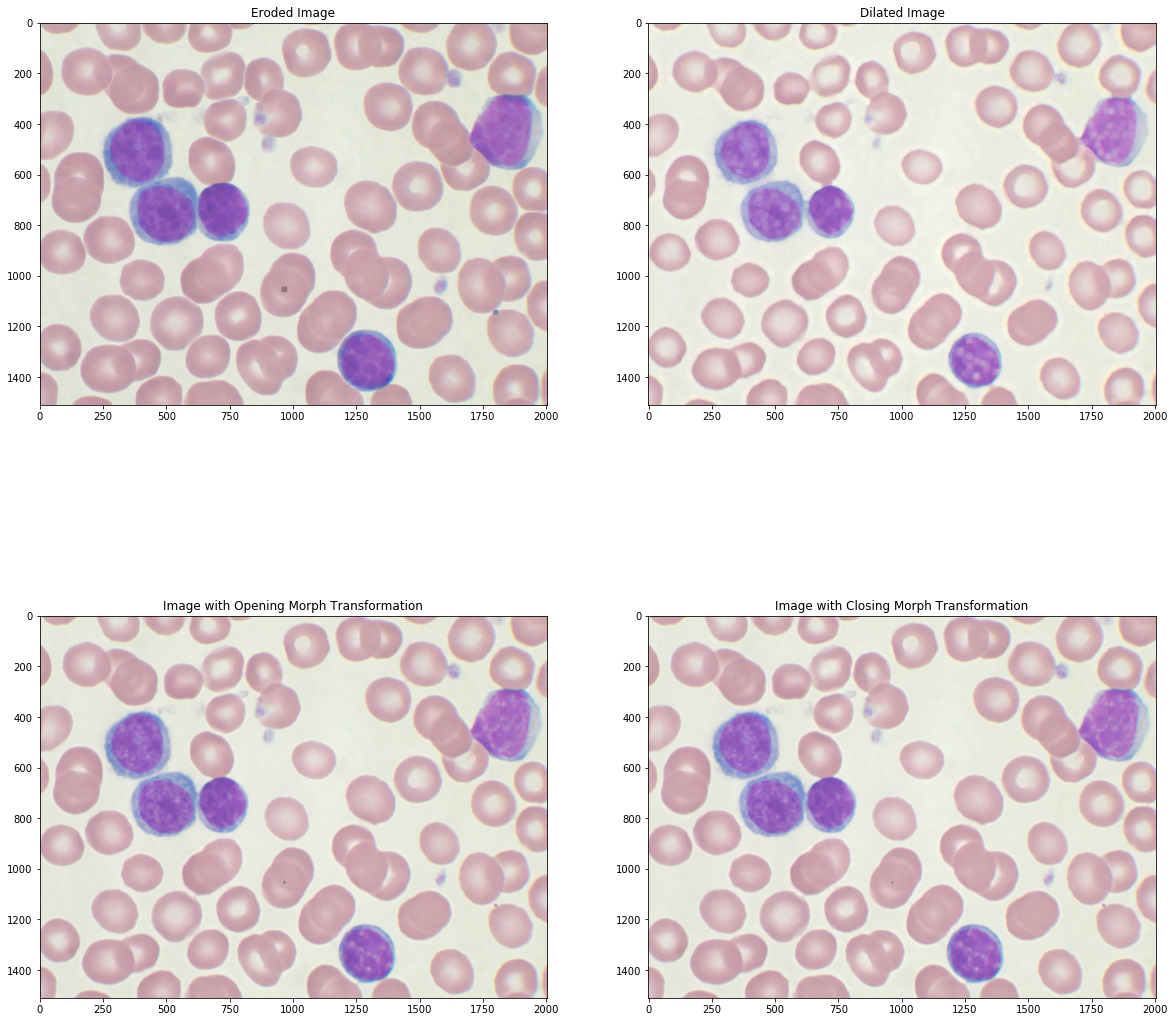

In [17]:
import cv2 
import numpy as np

image = imread('leukaemie.jpg')
kernel = np.ones((5,5), np.uint8)

image_erosion = cv2.erode(image,kernel,iterations=3)
image_dilation = cv2.dilate(image,kernel,iterations=3)
image_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
image_closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20,20))

#plt.subplot(1, 1,1),plt.imshow(image)
#plt.title("Eroded Image")

plt.subplot(2, 2,1),plt.imshow(image_erosion)
plt.title("Eroded Image")
plt.subplot(2, 2,2),plt.imshow(image_dilation)
plt.title("Dilated Image")
plt.subplot(2, 2,3),plt.imshow(image_opening)
plt.title("Image with Opening Morph Transformation")
plt.subplot(2, 2,4),plt.imshow(image_closing)
plt.title("Image with Closing Morph Transformation")
plt.show()